Explained variance by each component: [0.40949325 0.32345238 0.131184  ]

Cumulative explained variance: [0.40949325 0.73294563 0.86412963]
PCA components
 [[ 0.02147014  0.08697632 -0.57144295 -0.57380293 -0.46896922 -0.34094747]
 [ 0.69713155  0.68689017  0.05044107  0.09567895  0.08969742 -0.14981692]
 [ 0.10959015  0.15815024 -0.10287107 -0.17092148 -0.2957831   0.91416314]]

Loadings DataFrame:
             0         1         2         3         4         5
PC1  0.021470  0.086976 -0.571443 -0.573803 -0.468969 -0.340947
PC2  0.697132  0.686890  0.050441  0.095679  0.089697 -0.149817
PC3  0.109590  0.158150 -0.102871 -0.170921 -0.295783  0.914163
CPU time: 0.04485654830932617 seconds


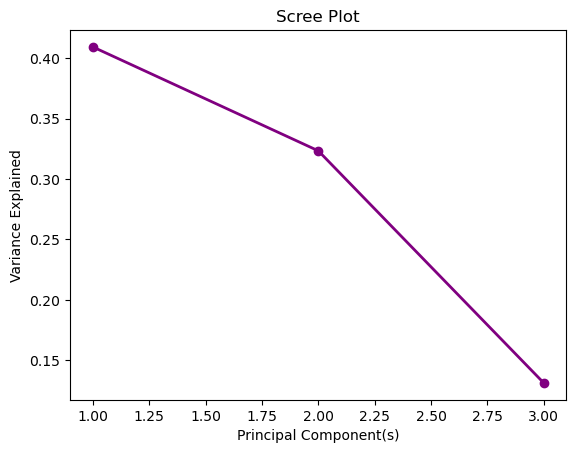

In [3]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import time


start_time = time.time()

# Read the CSV file
worldBankData = pd.read_csv('World Bank Data.csv', encoding='ISO-8859-1')

# Remove commas from the entire DataFrame (this will remove commas from all cells, including non-numeric ones)
worldBankData = worldBankData.replace(",", "", regex=True)

# Convert the entire DataFrame to numeric (invalid parsing will be coerced to NaN)
worldBankData = worldBankData.apply(pd.to_numeric, errors='coerce')

# Check the columns and their types to see which are numeric
#print(f"Columns data types:\n{worldBankData.dtypes}")

# Select only the numeric columns (both int64 and float64), excluding non-numeric columns
numericalColumns = worldBankData.select_dtypes(include=['float64', 'int64'])

# Print the shape of the numerical columns (should be (rows, n) where n is the number of numeric columns)
#print(f"Shape of numerical columns: {numericalColumns.shape}")
#print(f"Numerical columns: {numericalColumns.columns}")

# Initialize KNN Imputer with k=100 (100 nearest neighbors)
imputer = KNNImputer(n_neighbors= 100)

# Apply KNN imputer to the numerical columns
#Created imputed_data as a separate variable since trying to combine the data with the original is causing mismatch errors
imputed_data = imputer.fit_transform(numericalColumns)
#print(imputed_data)

# Check the shape of the imputed data
#print(f"Shape of imputed data: {imputed_data.shape}")

# Convert the imputed data back into a DataFrame with the correct column names
imputed_data_df = pd.DataFrame(imputed_data)
#print(imputed_data_df)

#check if any missing values remain after imputation
#missing_values_after_imputation = imputed_data_df.isnull().sum()
#print(f"Missing values after imputation: {missing_values_after_imputation}")

# Print the first few rows of the imputed data
#print(imputed_data_df.head())


scaler = StandardScaler()
standardizedImputedData = scaler.fit_transform(imputed_data_df)

pca = PCA(n_components = 3)

pca_result = pca.fit_transform(standardizedImputedData)

#print(pca_result)

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}\n")

# Cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()
print(f"Cumulative explained variance: {cumulative_explained_variance}")

# Convert PCA-transformed data into a DataFrame
pca_df = pd.DataFrame(pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])

# Display the first few rows
#print(pca_df.head())

print("PCA components\n",pca.components_)

loadings_df = pd.DataFrame(pca.components_, index=[f"PC{i+1}" for i in range(pca.components_.shape[0])])
print("\nLoadings DataFrame:\n", loadings_df)

end_time = time.time()

# Step 3: Calculate the CPU time by subtracting the start time from the end time
cpu_time = end_time - start_time


print(f"CPU time: {cpu_time} seconds")

#print("\nThis is the covariance\n", pca.get_covariance())

#mae = mean_absolute_error(y_test, yPrediction)
#print(f"Mean Absolute Error: {mae}")


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='purple')
plt.title('Scree Plot')
plt.xlabel('Principal Component(s)')
plt.ylabel('Variance Explained')
plt.savefig('Scree Plot ( with 3 components)')
plt.show()


